In [150]:
#https://www.kaggle.com/datasets/grubenm/austin-weather/data

import pandas as pd

df = pd.read_csv("/Users/christinaxie/Downloads/austin_weather.csv")

#turn some non-numeric values to numeric
df["WindHighMPH"] = pd.to_numeric(df["WindHighMPH"], errors='coerce')
df["WindAvgMPH"] = pd.to_numeric(df["WindAvgMPH"], errors='coerce')
df["WindGustMPH"] = pd.to_numeric(df["WindGustMPH"], errors='coerce')

df["HumidityHighPercent"] = pd.to_numeric(df["HumidityHighPercent"], errors='coerce')
df["HumidityAvgPercent"] = pd.to_numeric(df["HumidityAvgPercent"], errors='coerce')
df["HumidityLowPercent"] = pd.to_numeric(df["HumidityLowPercent"], errors='coerce')

#df.head()
df.describe()

,TempHighF,TempAvgF,TempLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,WindHighMPH,WindAvgMPH,WindGustMPH
count,1319.000000,1319.000000,1319.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1315.000000
mean,80.862775,70.642911,59.902957,87.872437,66.671982,44.958998,13.231587,5.008352,21.373384
std,14.766523,14.045904,14.190648,11.038637,12.463634,16.974632,3.425096,2.086450,5.875657
min,32.000000,29.000000,19.000000,37.000000,27.000000,10.000000,6.000000,1.000000,9.000000
25%,72.000000,62.000000,49.000000,85.000000,59.000000,33.000000,10.000000,3.000000,17.000000
50%,83.000000,73.000000,63.000000,90.000000,67.000000,44.000000,13.000000,5.000000,21.000000
75%,92.000000,83.000000,73.000000,94.000000,74.000000,55.000000,15.000000,6.000000,25.000000
max,107.000000,93.000000,81.000000,100.000000,97.000000,93.000000,29.000000,12.000000,57.000000


Text(0.5, 1.0, 'Correlation Matrix of Weather Variables')

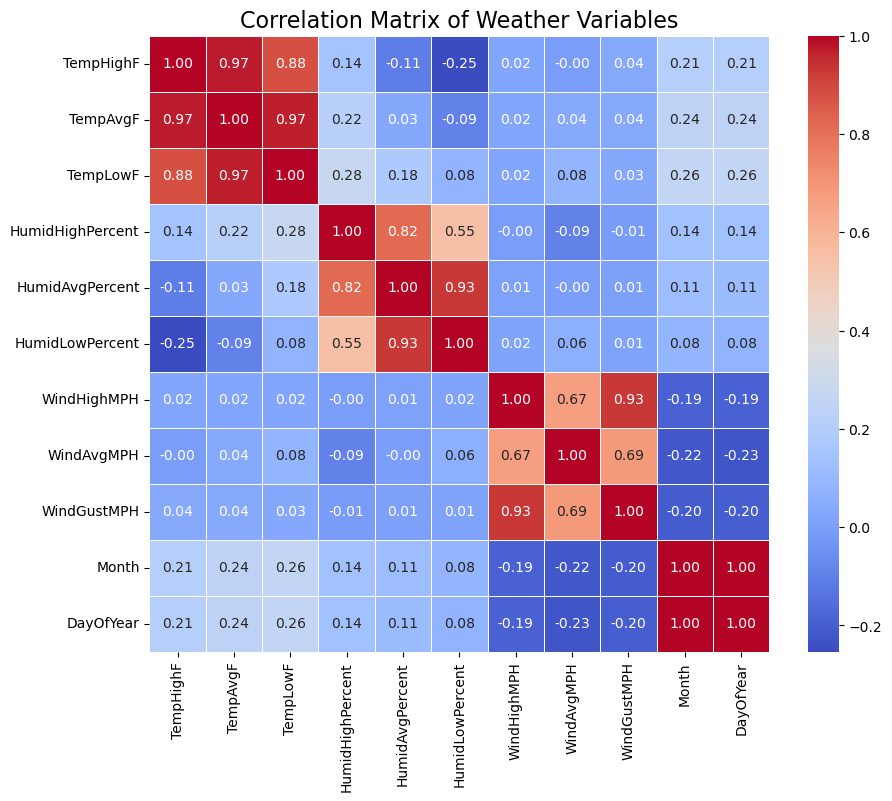

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df has a 'Date' column in yyyy-mm-dd format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract time-based features
df['Month'] = df['Date'].dt.month
df['DayOfYear'] = df['Date'].dt.dayofyear

df2 = pd.DataFrame({
    "TempHighF": df["TempHighF"],
    "TempAvgF": df["TempAvgF"],
    "TempLowF": df["TempLowF"],
    "HumidHighPercent": df["HumidityHighPercent"],
    "HumidAvgPercent": df["HumidityAvgPercent"],
    "HumidLowPercent": df["HumidityLowPercent"],
    "WindHighMPH": df["WindHighMPH"],
    "WindAvgMPH": df["WindAvgMPH"],
    "WindGustMPH": df["WindGustMPH"],
    # Add the time features to your new DataFrame
    "Month": df['Month'],  # New feature
    "DayOfYear": df['DayOfYear']  # New feature
})

correlation_matrix = df2.corr()

# Create a heatmap to visualize the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set the title and display the heatmap
plt.title("Correlation Matrix of Weather Variables", fontsize=16)
plt.show()

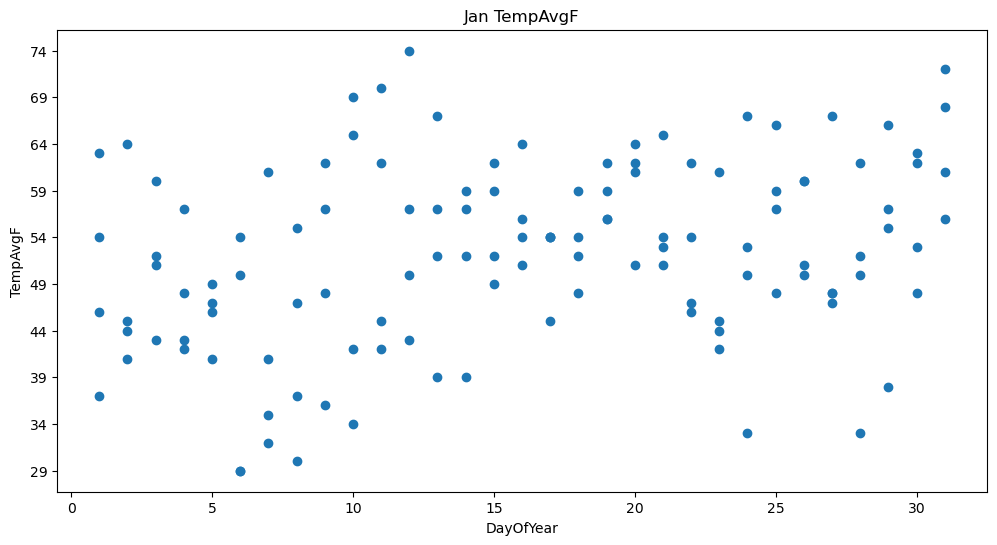

In [206]:
df2.describe()
jan = df[(df["DayOfYear"] >= 1) & (df["DayOfYear"] <= 31)]
plt.figure(figsize=(12, 6))
plt.yticks(np.arange(jan["TempAvgF"].min(), jan["TempAvgF"].max() + 1, step=5))
plt.scatter(jan["DayOfYear"], jan["TempAvgF"])
plt.xlabel("DayOfYear")
plt.ylabel("TempAvgF")
plt.title("Jan TempAvgF")
plt.show()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'TempHighF'}>,
        <Axes: title={'center': 'TempAvgF'}>],
       [<Axes: title={'center': 'TempLowF'}>,
        <Axes: title={'center': 'HumidityHighPercent'}>,
        <Axes: title={'center': 'HumidityAvgPercent'}>],
       [<Axes: title={'center': 'HumidityLowPercent'}>,
        <Axes: title={'center': 'WindHighMPH'}>,
        <Axes: title={'center': 'WindAvgMPH'}>],
       [<Axes: title={'center': 'WindGustMPH'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'DayOfYear'}>]], dtype=object)

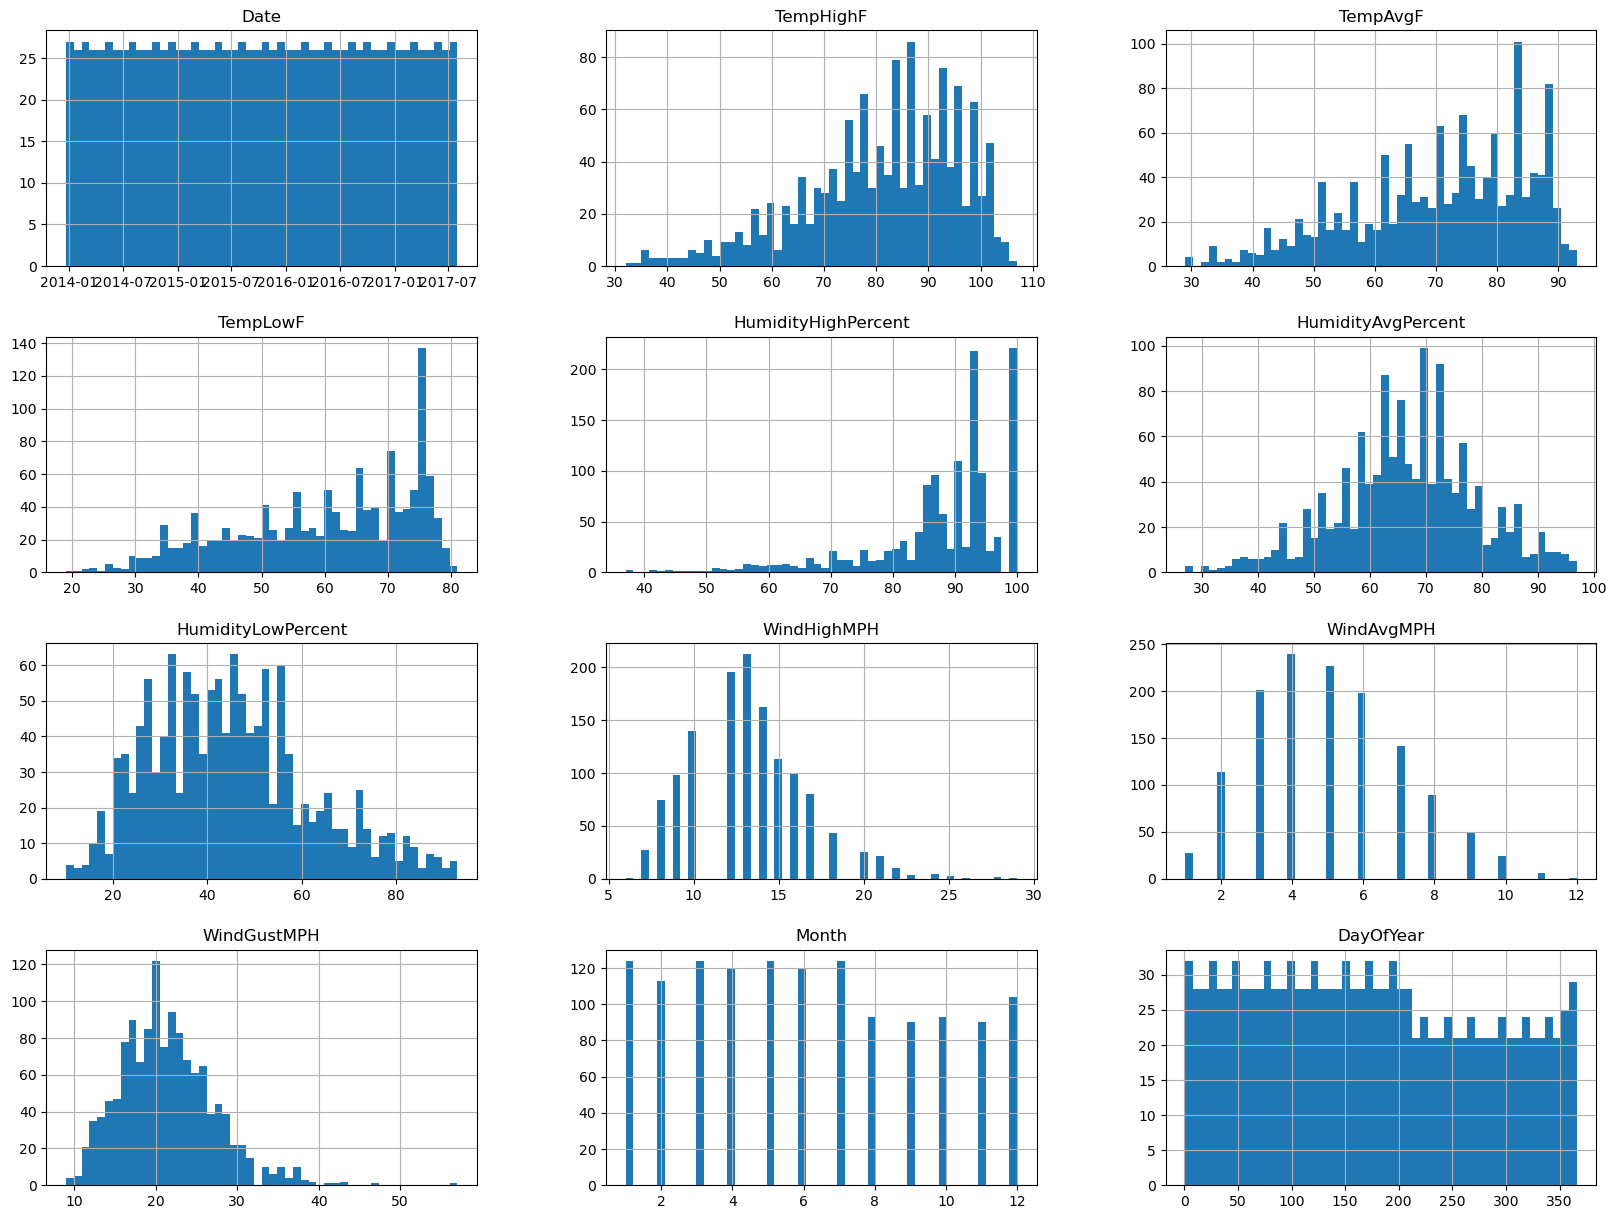

In [208]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))

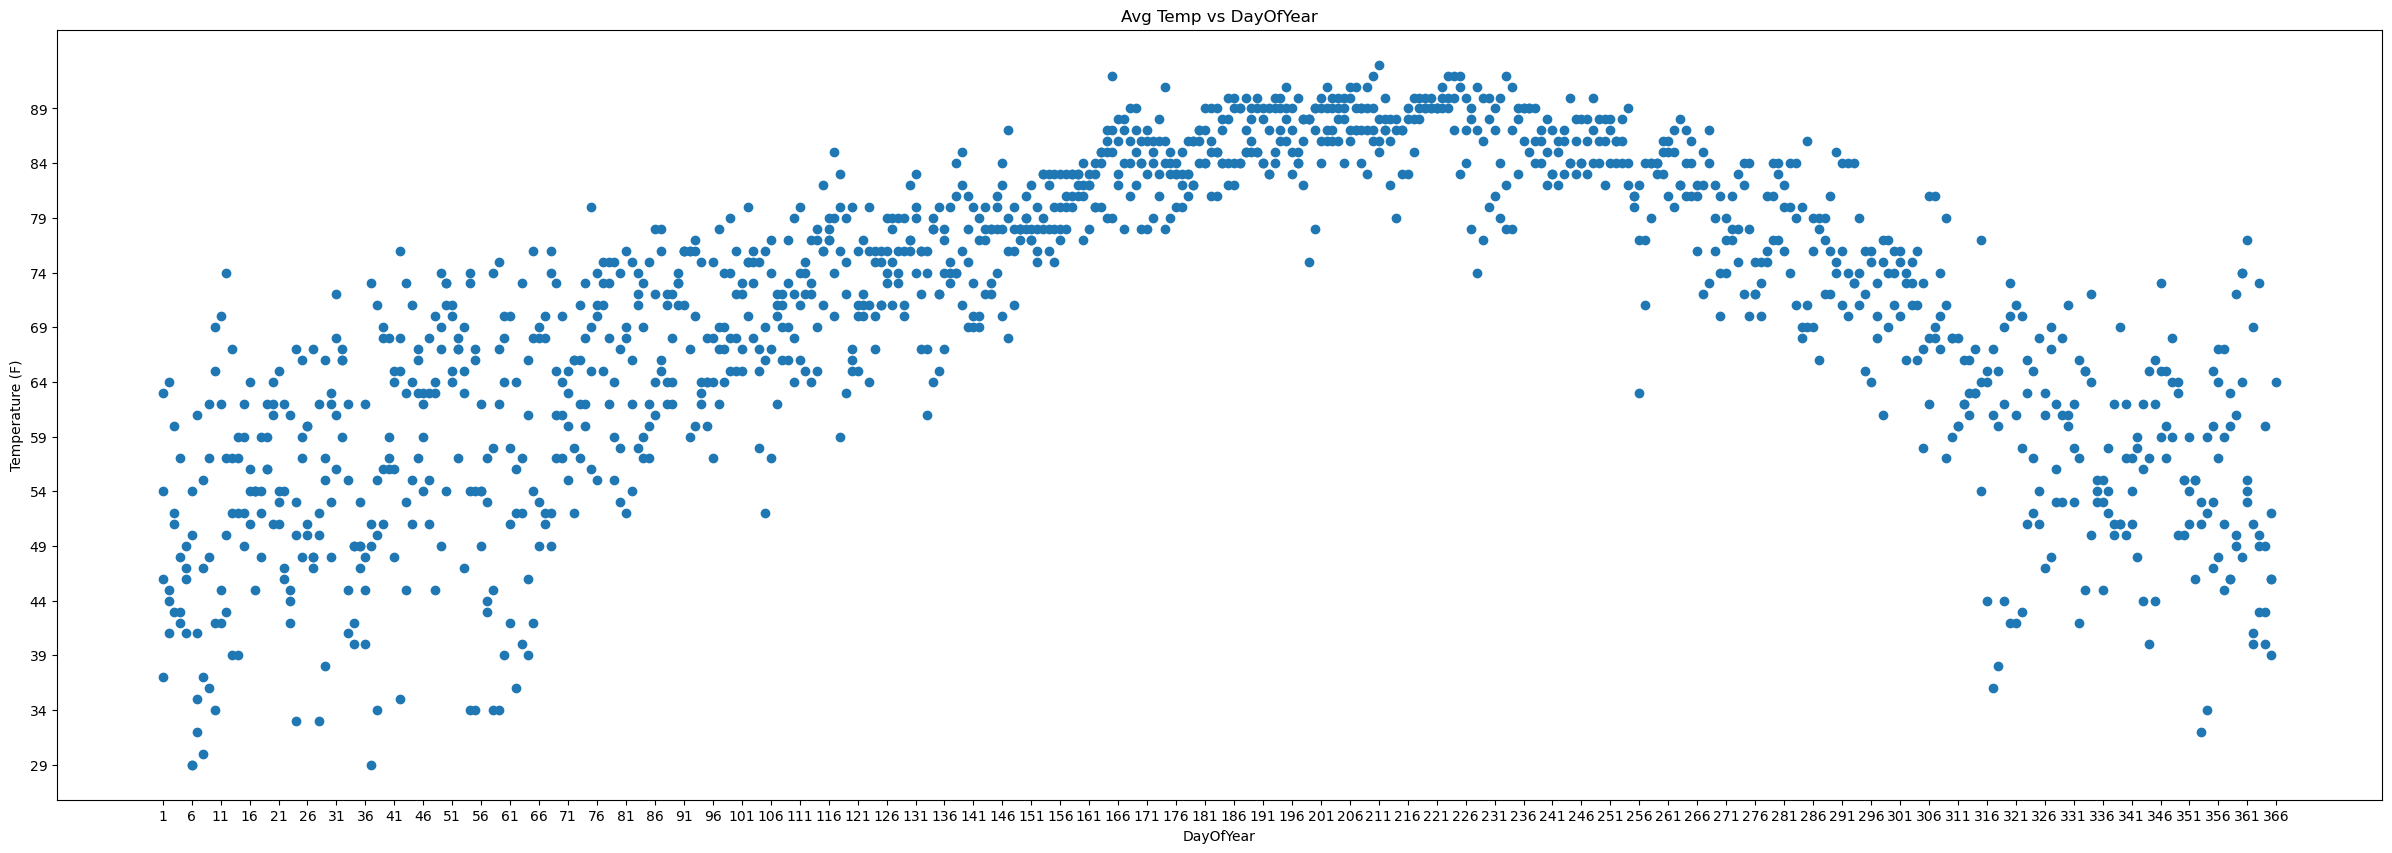

In [202]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
plt.yticks(np.arange(df["TempAvgF"].min(), df["TempAvgF"].max() + 1, step=5))
plt.xticks(np.arange(df["DayOfYear"].min(), df["DayOfYear"].max() + 1, step=5))
plt.scatter(df["DayOfYear"], df["TempAvgF"])
plt.xlabel("DayOfYear")
plt.ylabel("Temperature (F)")
plt.title("Avg Temp vs DayOfYear")
plt.show()

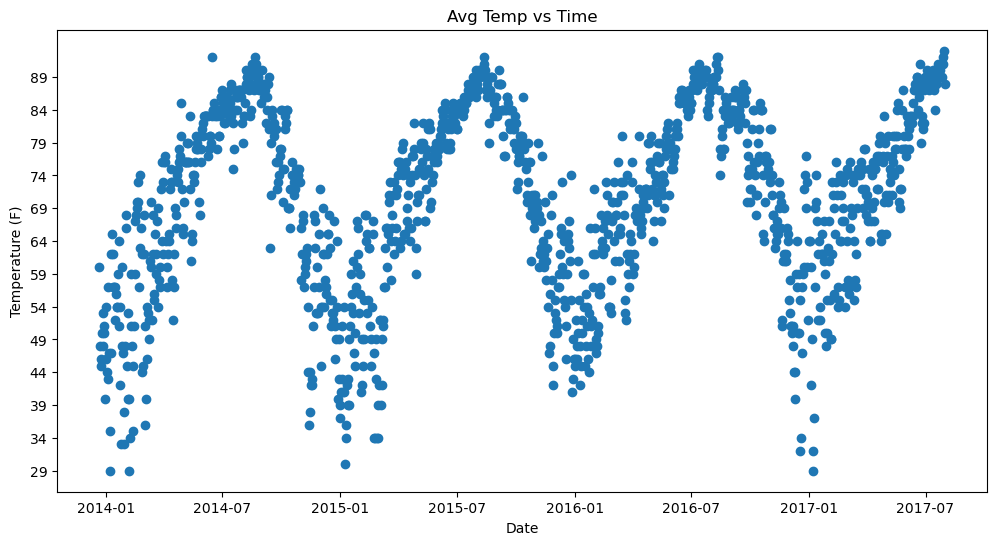

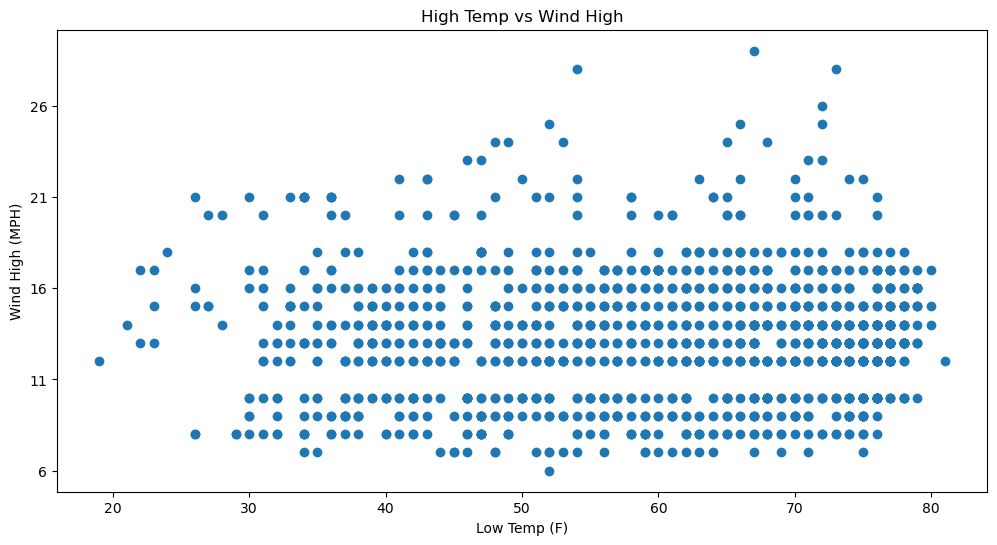

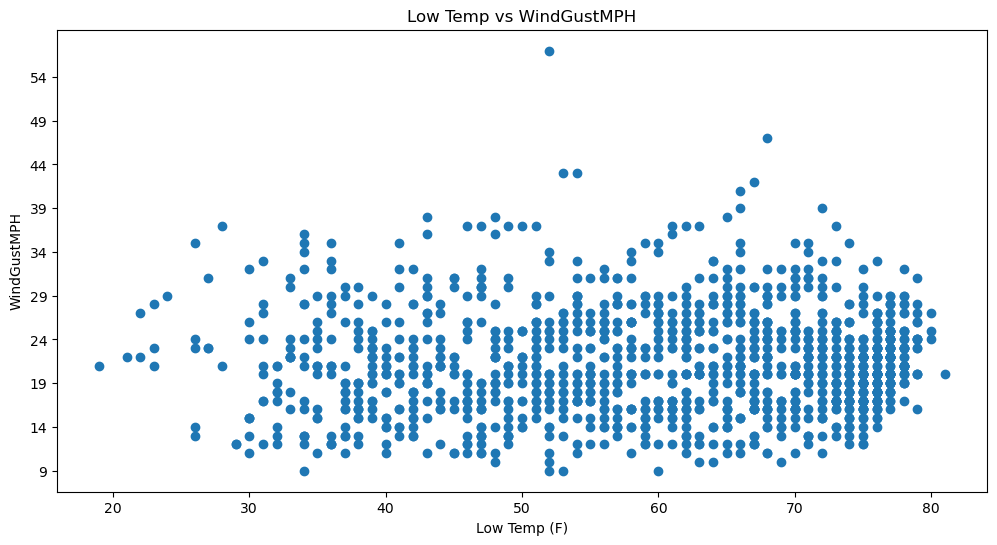

Correlation coefficient: 0.03834110069560033


In [103]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 6))
plt.yticks(np.arange(df["TempAvgF"].min(), df["TempAvgF"].max() + 1, step=5))
plt.scatter(df["Date"], df["TempAvgF"])
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.title("Avg Temp vs Time")
plt.show()


df["WindHighMPH"] = pd.to_numeric(df["WindHighMPH"], errors='coerce')

plt.figure(figsize=(12, 6))
plt.yticks(np.arange(df["WindHighMPH"].min(), df["WindHighMPH"].max() + 1, step=5))
plt.scatter(df["TempLowF"], df["WindHighMPH"])
plt.xlabel("Low Temp (F)")
plt.ylabel("Wind High (MPH)")
plt.title("High Temp vs Wind High")
plt.show()

df["WindGustMPH"] = pd.to_numeric(df["WindGustMPH"], errors='coerce')

plt.figure(figsize=(12, 6))
plt.yticks(np.arange(df["WindGustMPH"].min(), df["WindGustMPH"].max() + 1, step=5))
plt.scatter(df["TempLowF"], df["WindGustMPH"])
plt.xlabel("Low Temp (F)")
plt.ylabel("WindGustMPH")
plt.title("Low Temp vs WindGustMPH")
plt.show()

# Ensure 'WindGustMPH' is numeric and drop NaNs
df["WindGustMPH"] = pd.to_numeric(df["WindGustMPH"], errors='coerce')
df.dropna(subset=["WindGustMPH"], inplace=True)

# Calculate correlation using pandas
correlation_coefficient = df["TempHighF"].corr(df["WindGustMPH"])

print("Correlation coefficient:", correlation_coefficient)

